<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/vitaldb_open_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using VitalDB open dataset

## Preparation
For using the VitalDB open dataset, first we need to load 3 endpoints using the pandas library.

In [14]:
import pandas as pd
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

## Clinical informations
Let's check the cases and variables in the clinical information table.

Complete list of parameters and their description is available at https://vitaldb.net/docs/?documentId=13qqajnNZzkN7NZ9aXnaQ-47NWy7kx-a6gbrcEsi-gak#h.y1yyuwuwpa9c

In [2]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


Then, check the missing rate in the clinical information.

In [3]:
pd.DataFrame((df_cases.isnull().mean() * 100).sort_values(ascending=False), columns=['missing rate'])

,missing rate
cline2,99.060739
lmasize,98.403256
aline2,98.356293
preop_be,91.671885
preop_sao2,91.656230
...,...
ane_type,0.000000
preop_htn,0.000000
preop_dm,0.000000
preop_ecg,0.000000


## Track List
The Track list table has a track name (`tname`) and track ID (`tid`) for each case.

Complete list of tracks and their description is available at https://vitaldb.net/docs/?documentId=13qqajnNZzkN7NZ9aXnaQ-47NWy7kx-a6gbrcEsi-gak#h.d0wofkno1fxp

In [4]:
df_trks

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0
...,...,...,...
486444,6388,Solar8000/VENT_PIP,2d63adbc7e2653f14348e219816673cde3358cf6
486445,6388,Solar8000/VENT_PPLAT,6f6604255858ddc8f6a01b9f4774b0d43105f6da
486446,6388,Solar8000/VENT_RR,f34f3fae7fd963355c1c7060e1e876d20fa87536
486447,6388,Solar8000/VENT_SET_TV,4a4a55b8aebf9c76a4a76f62a7c1ec6fcb80e618


Let's check the missing rate of the track table.

In [5]:
missing_rates = []
for tname in sorted(df_trks['tname'].unique()):
    missing_rates.append({'track': tname, 'missing rate': 100 - (df_trks['tname'] == tname).sum() / len(df_cases) * 100})
pd.DataFrame(missing_rates).sort_values(by='missing rate')

,track,missing rate
146,Solar8000/HR,0.015654
155,Solar8000/PLETH_SPO2,0.031309
154,Solar8000/PLETH_HR,0.031309
91,Primus/CO2,0.407013
109,Primus/PAMB_MBAR,0.422668
...,...,...
39,Orchestra/AMD_RATE,99.984346
40,Orchestra/AMD_VOL,99.984346
59,Orchestra/NPS_RATE,99.984346
89,Orchestra/VEC_VOL,99.984346


## Laboratory results
Complete list of tracks and their description is available at https://vitaldb.net/docs/?documentId=13qqajnNZzkN7NZ9aXnaQ-47NWy7kx-a6gbrcEsi-gak#h.qh5znywc24u2

In [6]:
print('{} lab types'.format(len(df_labs['name'].unique())))
df_labs

34 lab types


,caseid,dt,name,result
0,1,594470,alb,2.90
1,1,399575,alb,3.20
2,1,12614,alb,3.40
3,1,137855,alb,3.60
4,1,399575,alt,12.00
...,...,...,...,...
928443,6388,3503,sao2,100.00
928444,6388,408770,wbc,3.28
928445,6388,-32848,wbc,6.27
928446,6388,-249820,wbc,7.66


## Inclusion & Exclusion Criteria
Research using VitalDB open dataset usually starts with finding cases that meet the inclusion and exclusion criteria. The code below is an example of doing this.

In [7]:
caseids = list(
    set(df_trks.loc[df_trks['tname'] == 'Solar8000/ART_MBP', 'caseid']) & 
    set(df_cases.loc[df_cases['age'] > 18, 'caseid']) & 
    set(df_cases.loc[~df_cases['opname'].str.lower().str.contains("transplant"), 'caseid'])
)
print(f'{len(caseids)} cases found')

3452 cases found


## Read track samples using `load_case` function
The next step is to read the actual samples in a specific track. Using the `vitaldb` library is the simplest way.

In [8]:
!pip install vitaldb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 15 kB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 141 kB 16.4 MB/s 
     |████████████████████████████████| 8.6 MB 43.6 MB/s 
     |████████████████████████████████| 127 kB 59.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


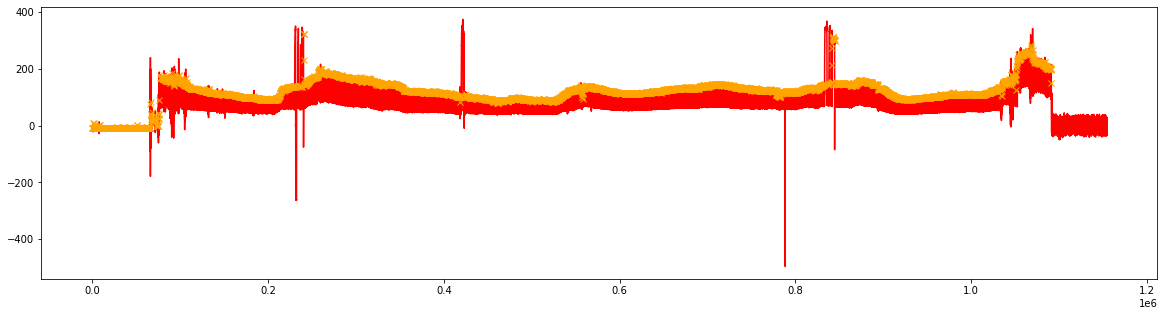

In [9]:
import vitaldb
vals = vitaldb.load_case(1, ['SNUADC/ART','Solar8000/ART_SBP'], 1/100)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 0], color='red')
plt.plot(vals[:, 1], color='orange', marker='x')
plt.show()

[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 ...
 [  0.148893 -32.5087  ]
 [ -0.325087  19.8266  ]
 [       nan        nan]]


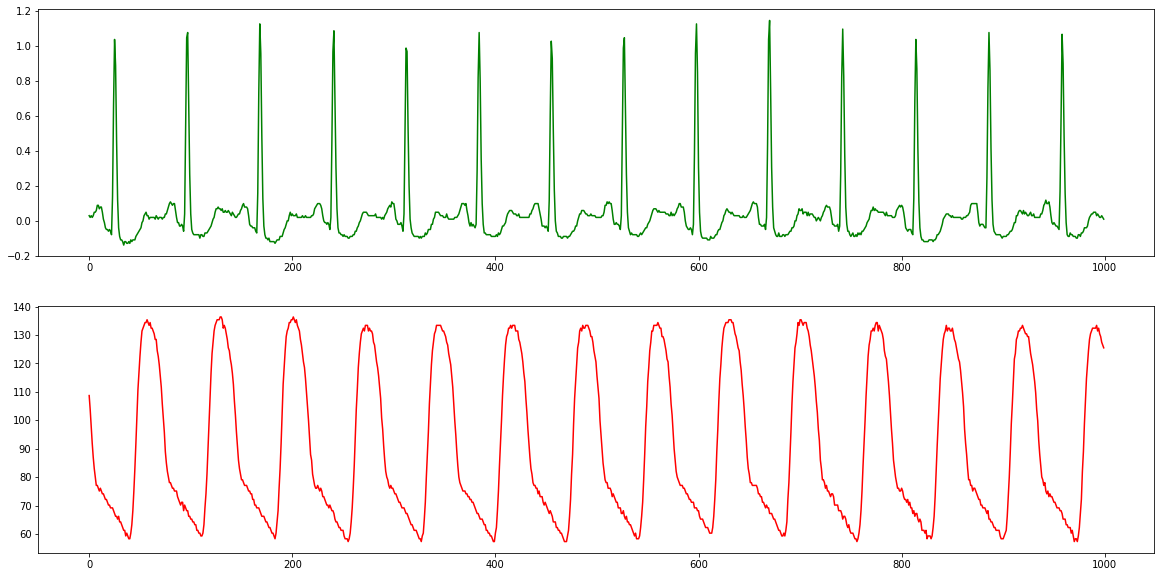

In [10]:
vals = vitaldb.load_case(caseids[0], ['ECG_II','ART'], 1/100)
print(vals)

ecg = vals[:,0]
art = vals[:,1]

# plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(ecg[110000:111000], color='g')
plt.subplot(212)
plt.plot(art[110000:111000], color='r')
plt.show()

## Read track samples using `VitalFile` class

Same as `load_case` in the functional API, you can download the tracks from the VitalDB open dataset.

In [12]:
vf = vitaldb.VitalFile(1, ['ECG_II', 'ART'])  # load the first case from open dataset
print(f'{len(vf.get_track_names())} tracks')

2 tracks


With the code below, you can download the first 5 cases that have 'Primus/AWP' track in the open dataset.

In [13]:
track_names = ['AWP']
for caseid in vitaldb.find_cases(track_names)[:5]:
    vf = vitaldb.VitalFile(caseid, track_names)
    vf.to_vital(f'awp{caseid}.vital')

## Find cases in the VitalDB open dataset

In [11]:
caseids = vitaldb.find_cases(['ECG_II', 'ART'])
len(caseids)

3644

## More examples
More examples using clinical information data in VitalDB are as below.


*   https://github.com/vitaldb/examples/blob/master/asa_mortality.ipynb
*   https://github.com/vitaldb/examples/blob/master/predict_mortality.ipynb

